In [1]:
# Loading data
from dataloader import get_loader
root = 'derivatives/'
# root =  'dataset/derivatives/' # -sil
creater = get_loader(root, channel_list=[0], n_sess= 3)
X, Y = creater.load_multiple_subjects([1])#, 2, 3, 4, 5, 6, 7, 8])

In [2]:
# Getting shape of EEG data
X.shape

(200, 128, 1153)

In [3]:
# Getting shape of label data
Y.shape

(200, 4)

In [4]:
# Concatenating channel data to create 2-dimensional EEG data matrix
from scipy.fft import fft
import numpy as np
fs = int(254)
start_idx = int(1*fs)
stop_idx = int(3.5*fs)
X = X[:,:,start_idx:stop_idx]
a,r,c = X.shape
#X = X.reshape(-1, r*c)
#X = fft(X)
#X = np.square(abs(X))
Y = Y[:, 1]

print(X.shape)


(200, 128, 635)


In [5]:
# Performing MFCC Extraction for all
from python_speech_features import mfcc
from python_speech_features import logfbank
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

num_channels = r
num_trials = a
num_coeffs = int(13)
rate = 16000

mfcc_feats = np.zeros([a,r,num_coeffs])
for channel in range(num_channels):
    # Concatenating channel data to create 2-dimensional EEG data matrix
    for trial in range(num_trials):
        temp = mfcc(X[trial,channel,:],rate)
        coeffs = temp.mean(axis=0)
        mfcc_feats[trial,channel,:] = coeffs
    # Concatenating channel data to create 2-dimensional EEG data matrix
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca').fit_transform(mfcc_feats[:,channel,:])
    print(X_embedded.shape)
    fig, ax = plt.subplots()
    df = pd.DataFrame(dict(dim1=X_embedded[:,0], dim2=X_embedded[:,1], direction=Y))
    colors = {0:'red', 1:'cyan', 2:'blue', 3:'yellow'}
    ax.scatter(df['dim1'], df['dim2'], c=df['direction'].map(colors))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_ticks([])
    frame1.axes.get_yaxis().set_ticks([])
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('t-SNE Mapping of MFCC Coefficients - Subject 1 Channel '+str(channel))
    plt.show()

C:\Users\mblun\anaconda3\envs\mlsp\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
C:\Users\mblun\anaconda3\envs\mlsp\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
C:\Users\mblun\anaconda3\envs\mlsp\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
C:\Users\mblun\anaconda3\envs\mlsp\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better co

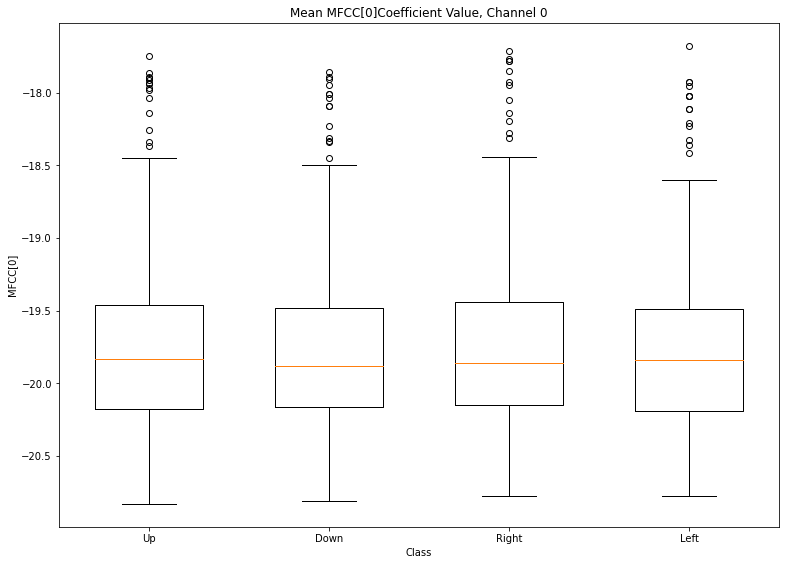

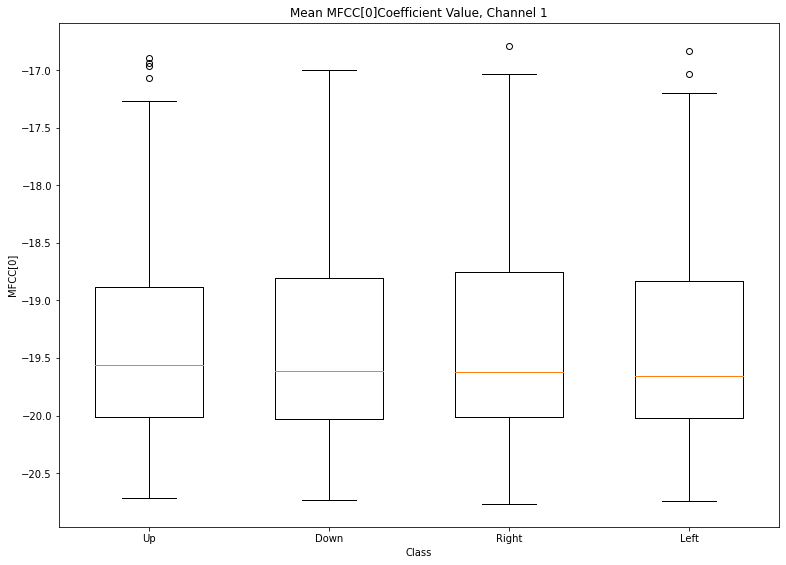

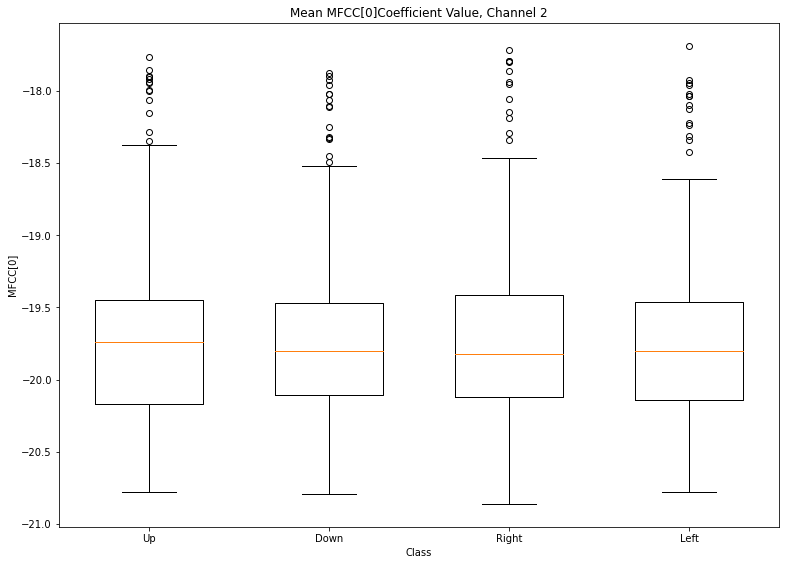

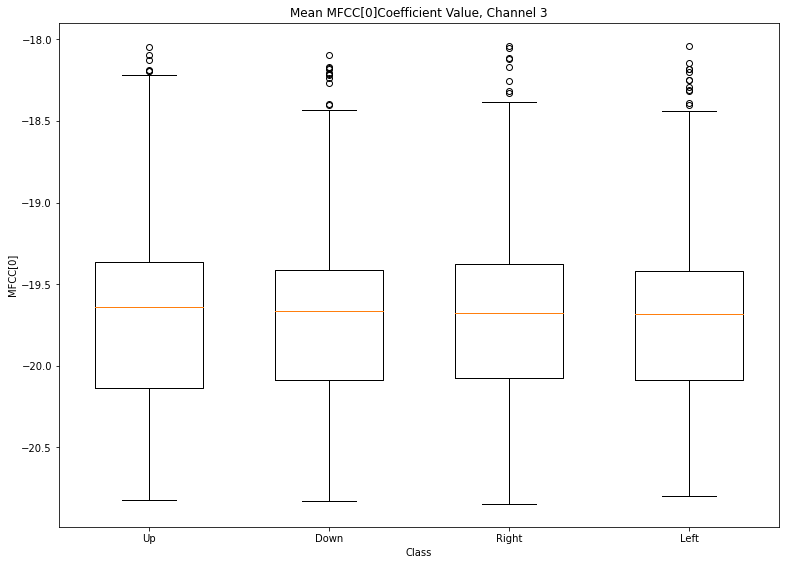

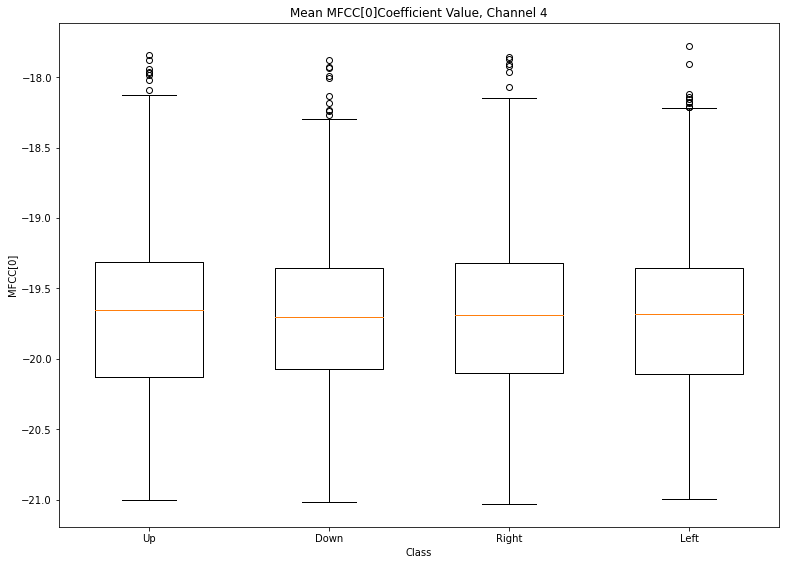

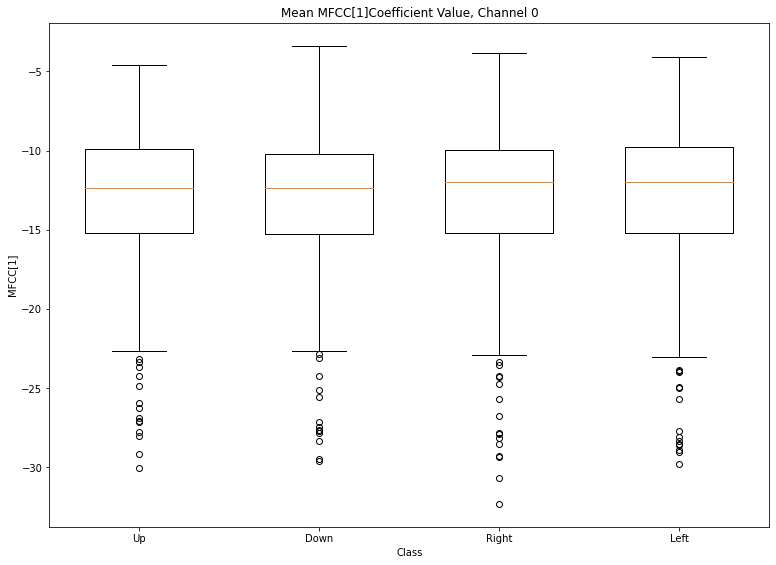

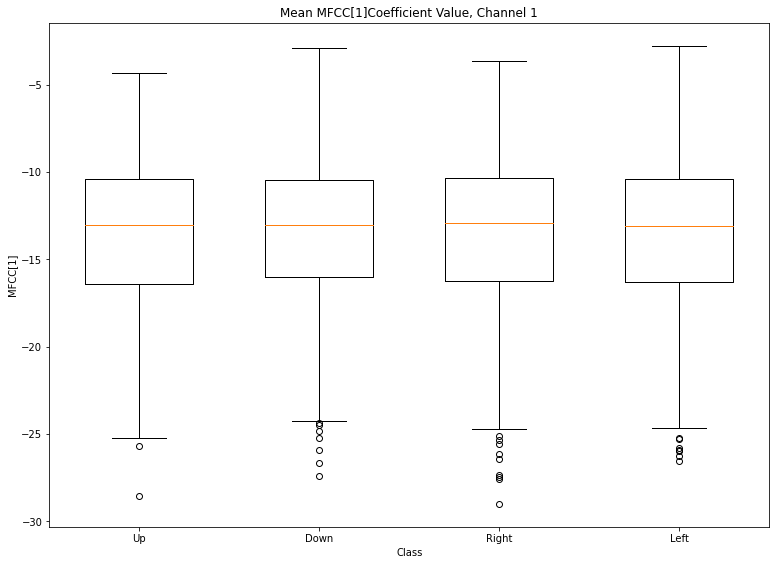

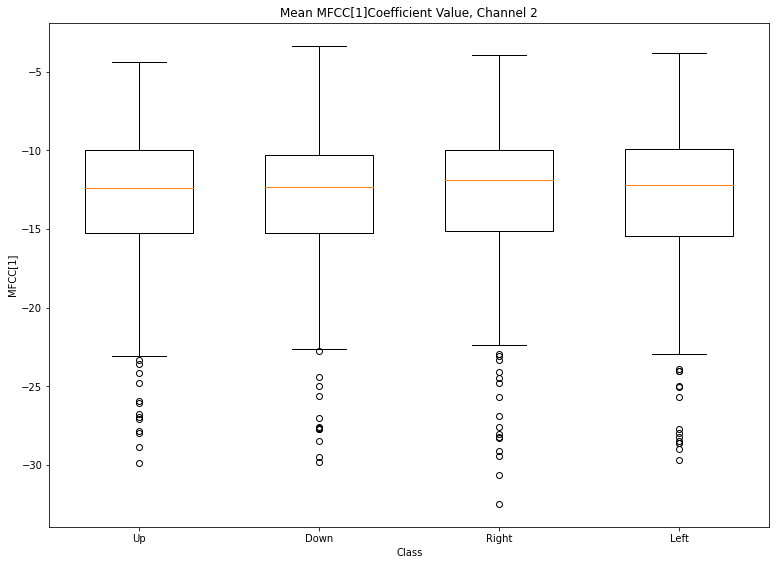

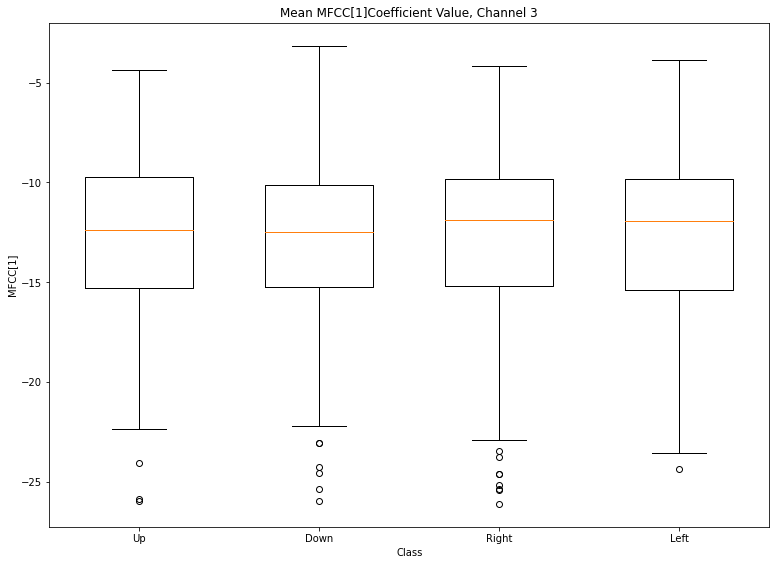

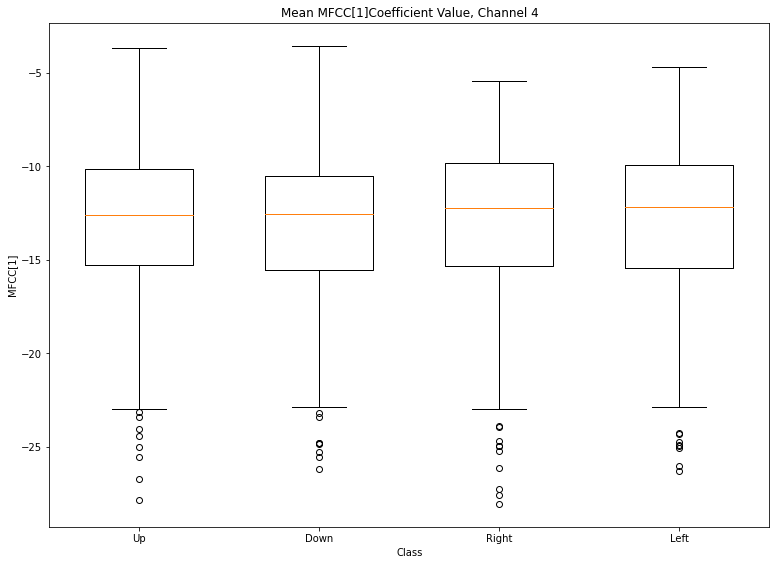

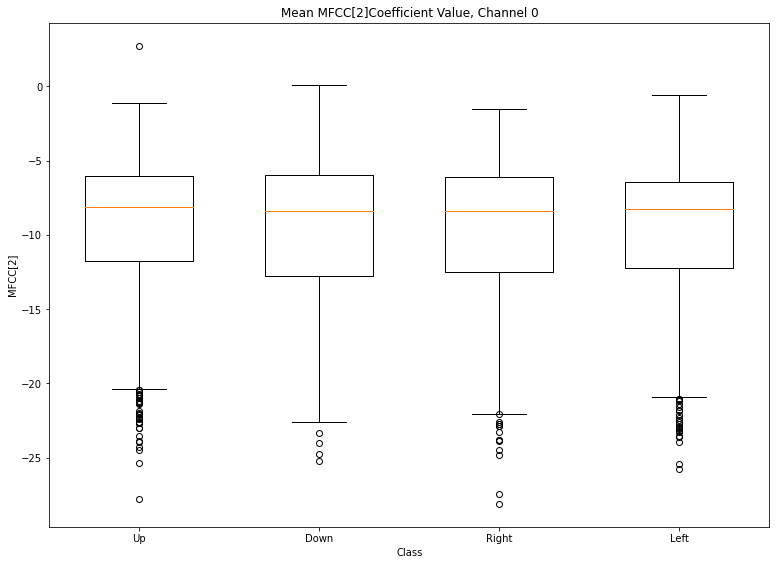

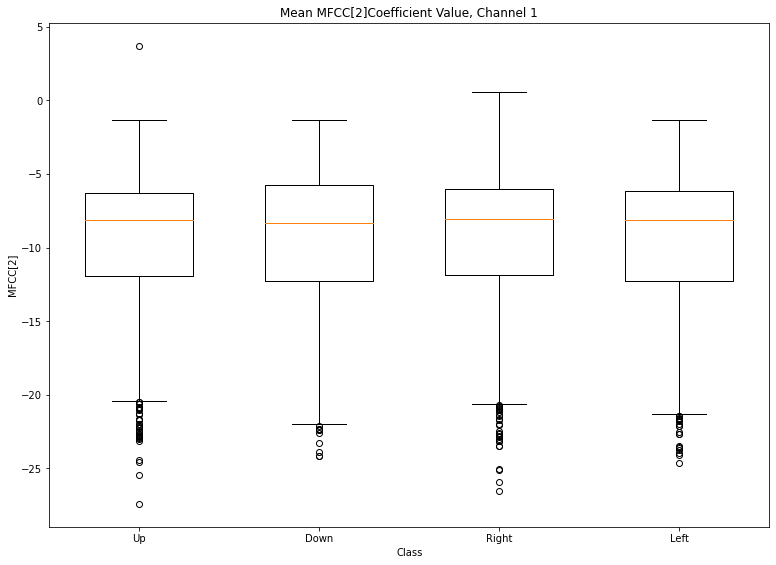

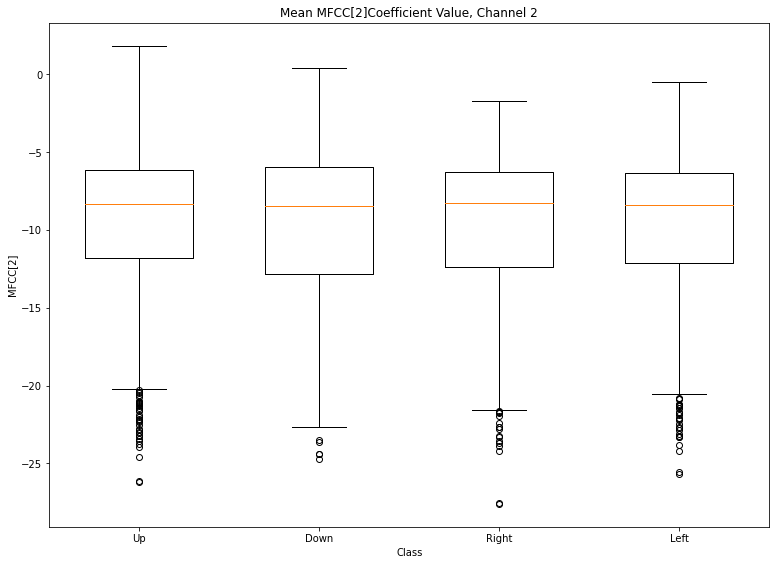

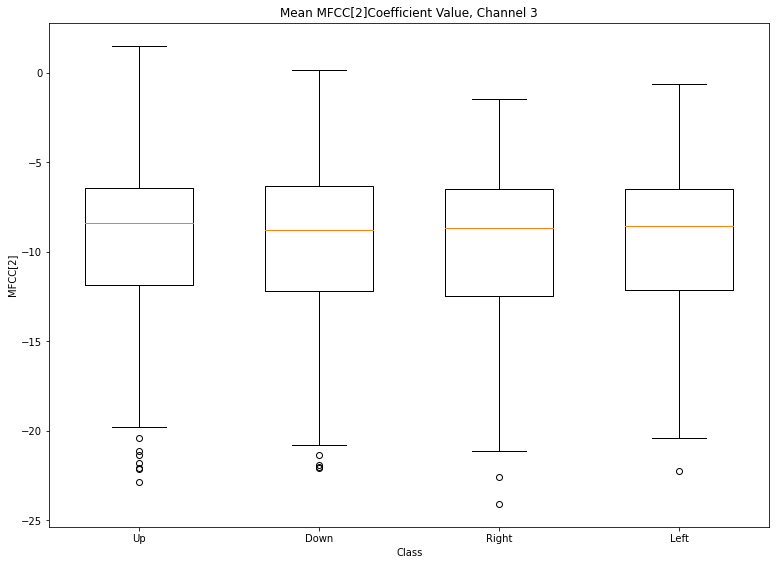

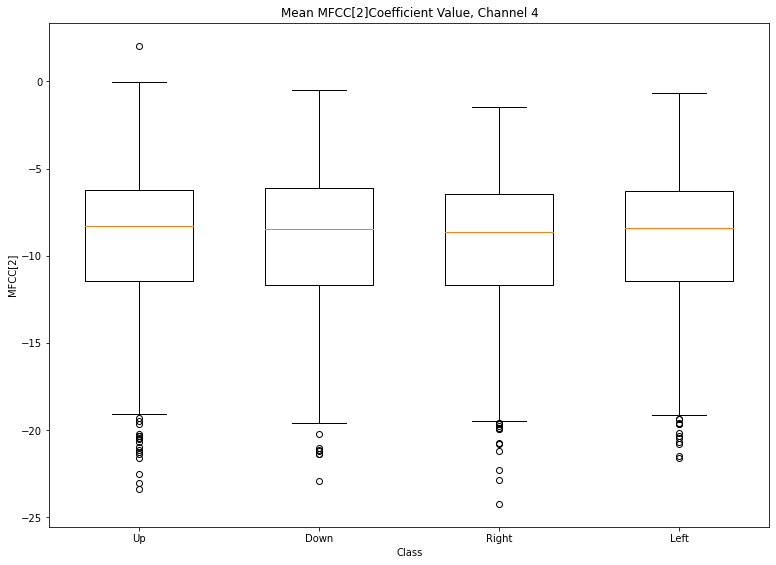

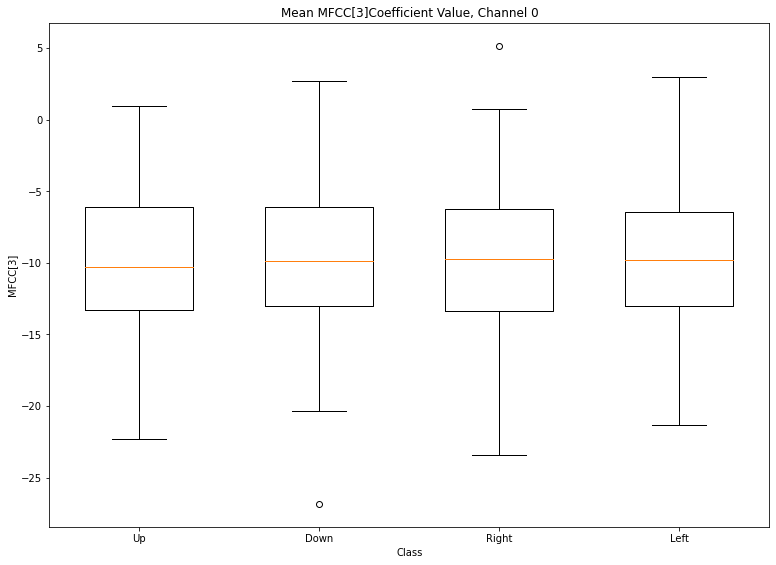

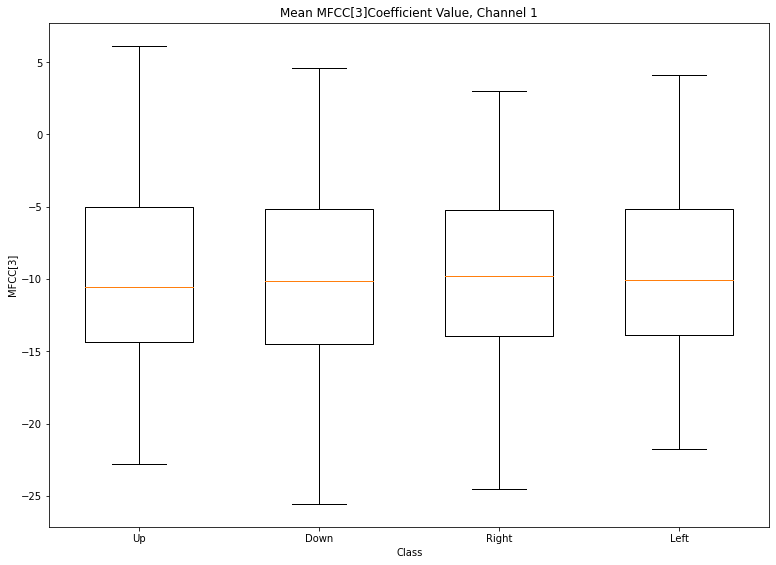

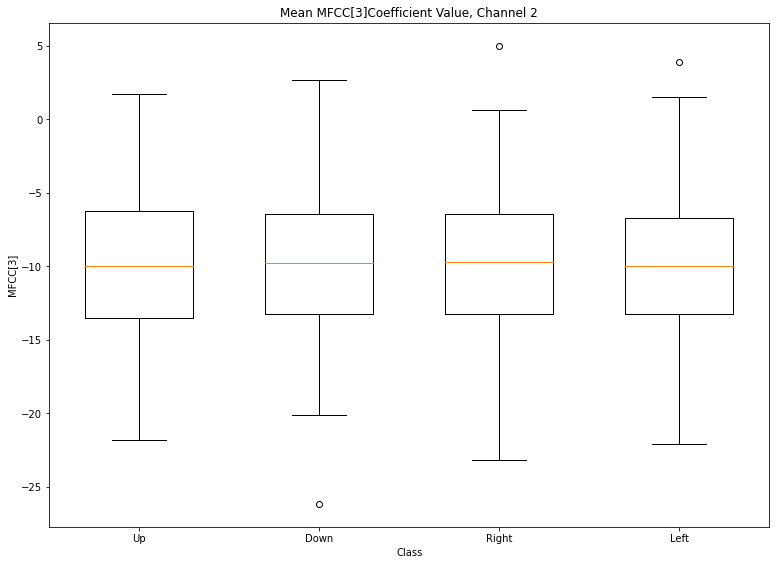

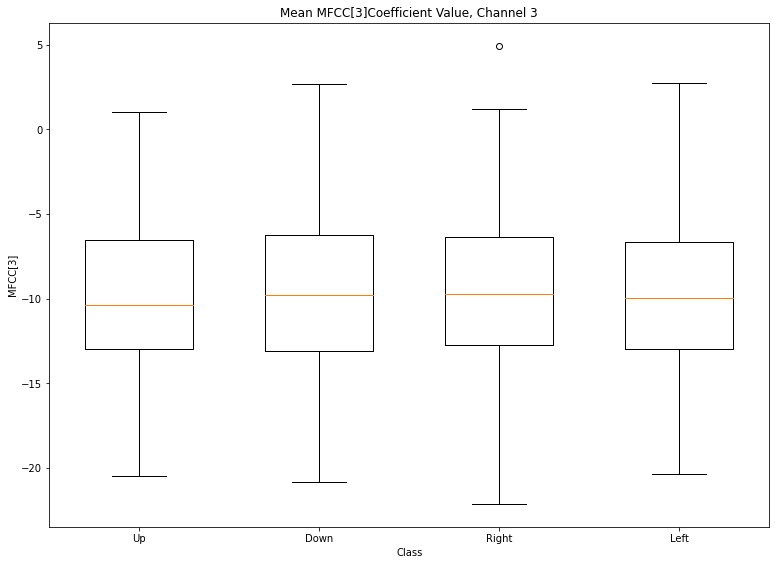

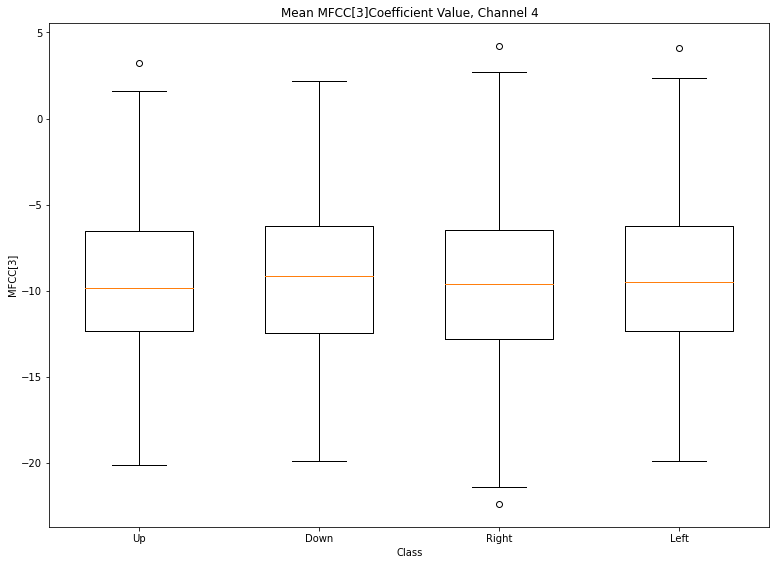

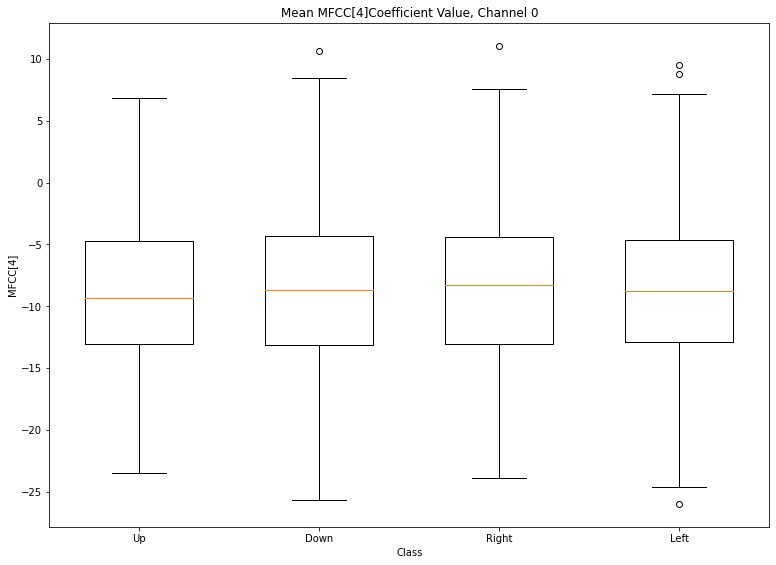

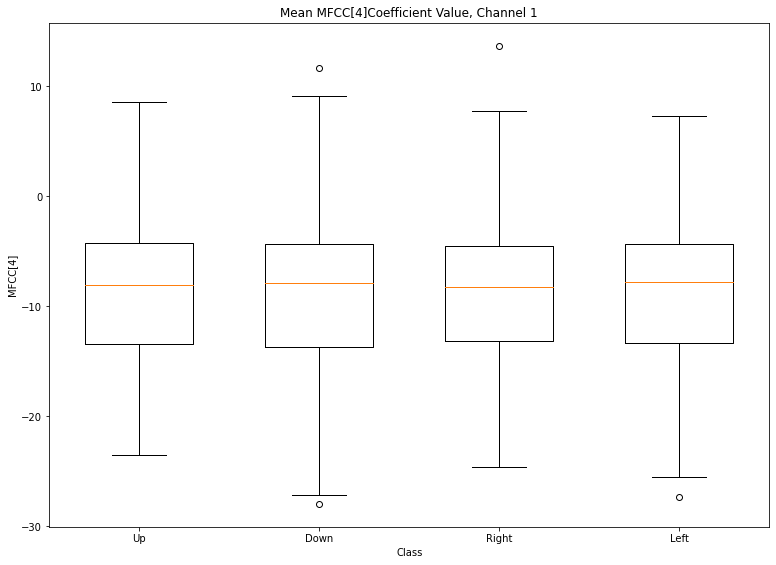

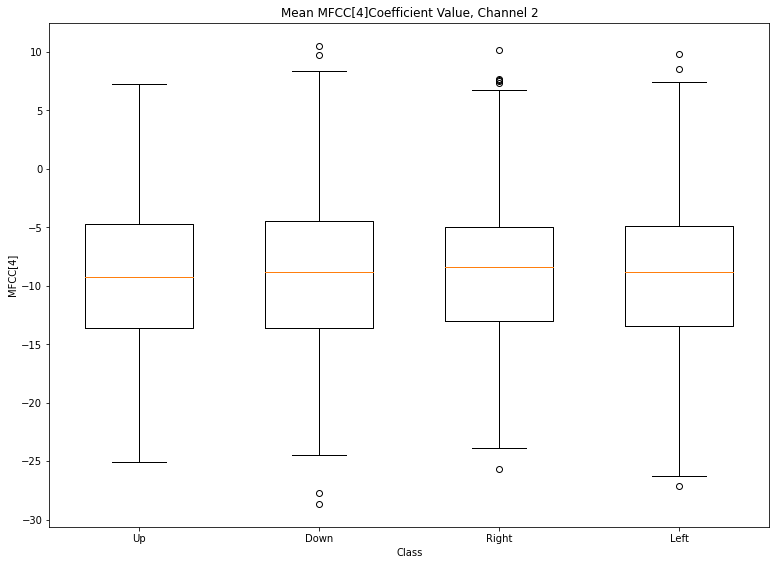

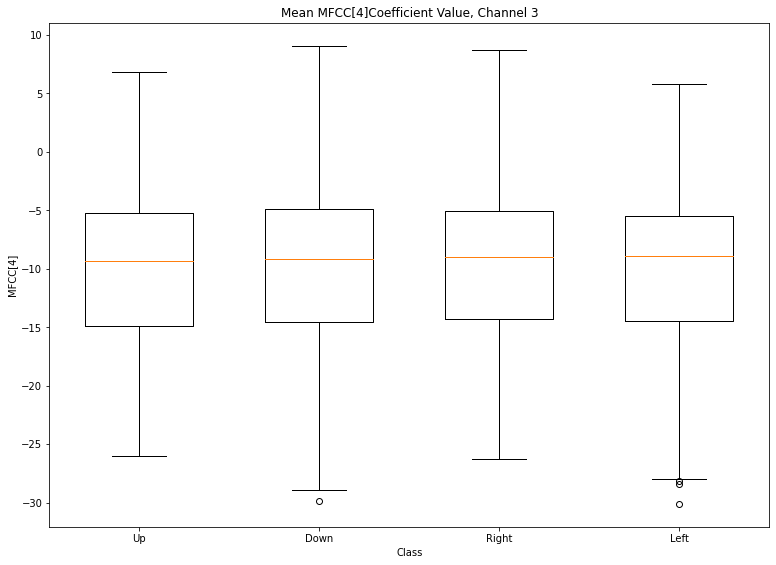

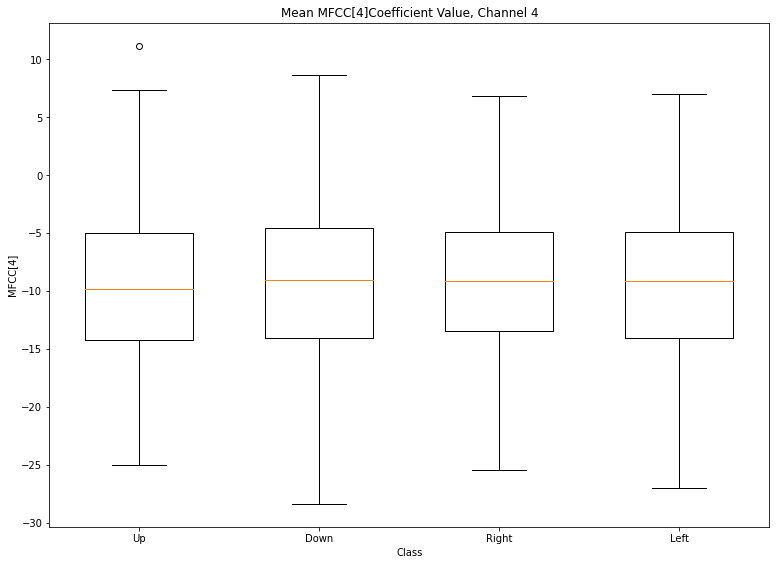

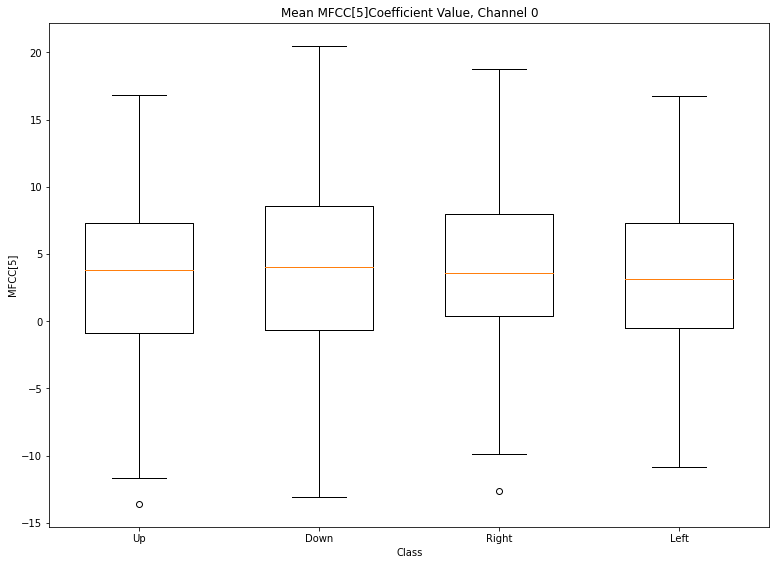

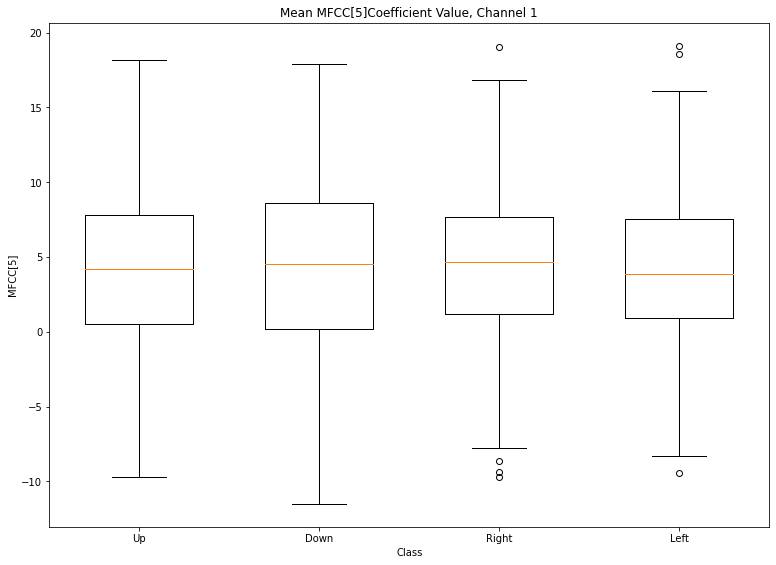

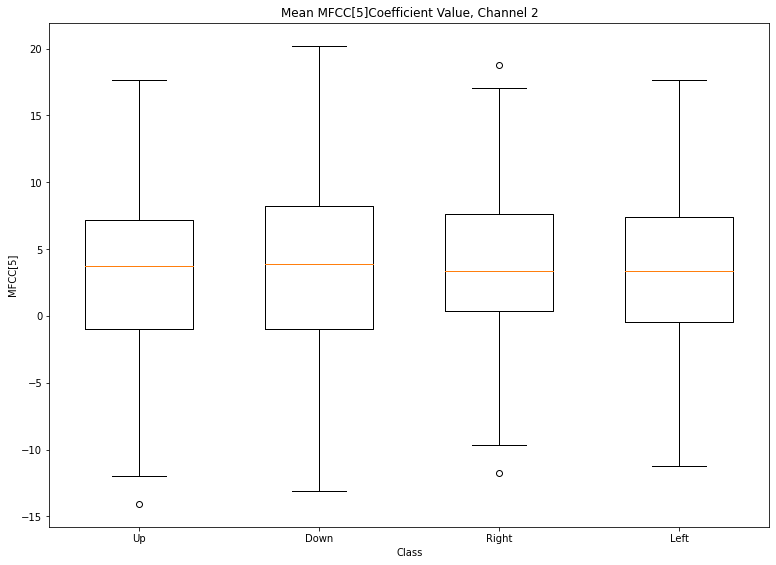

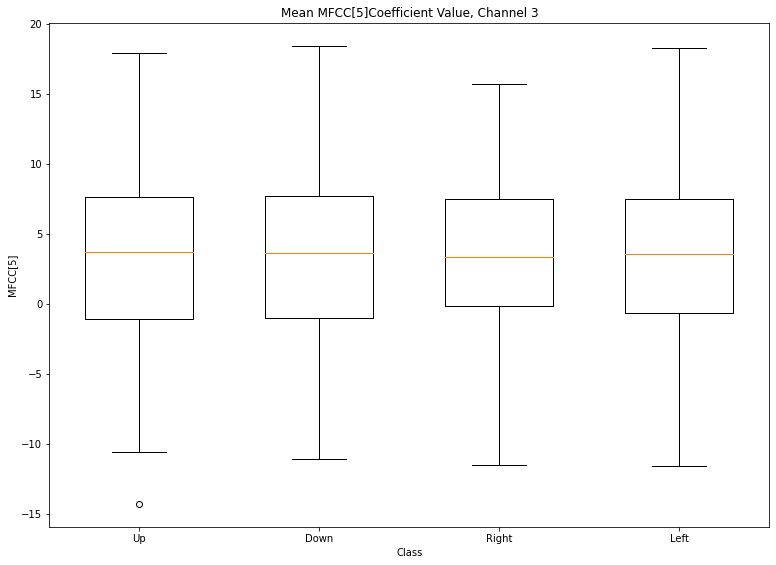

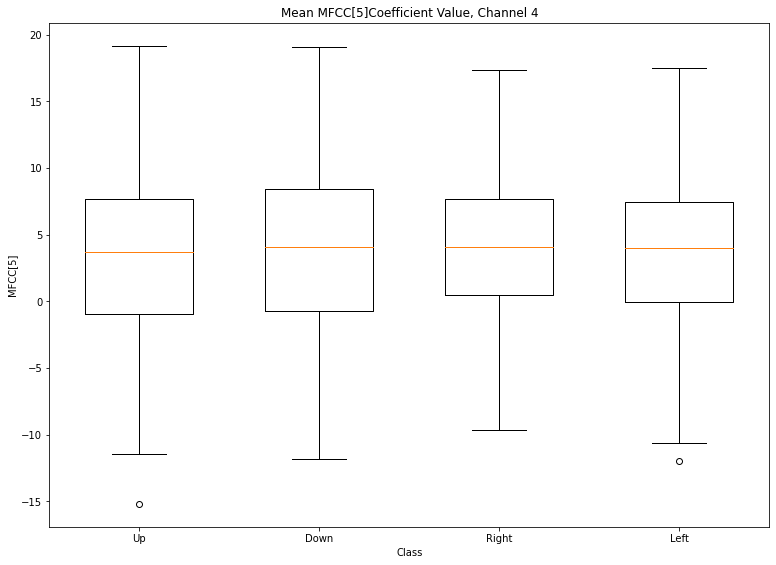

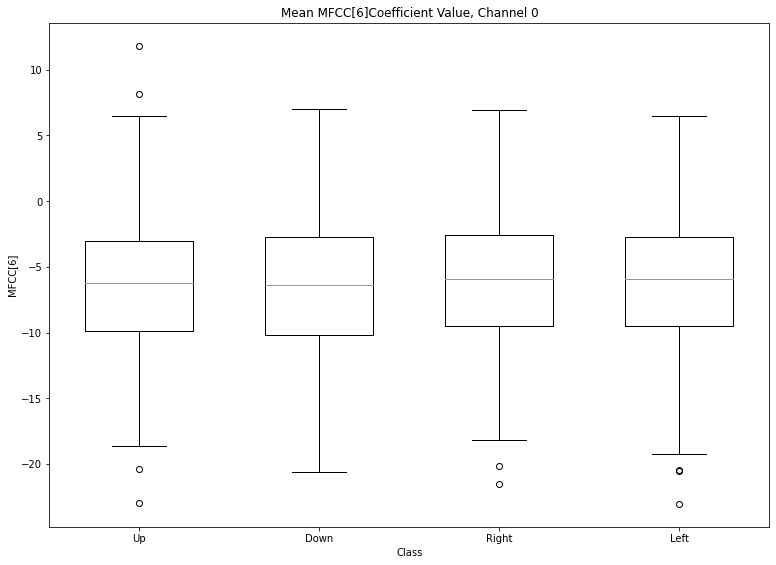

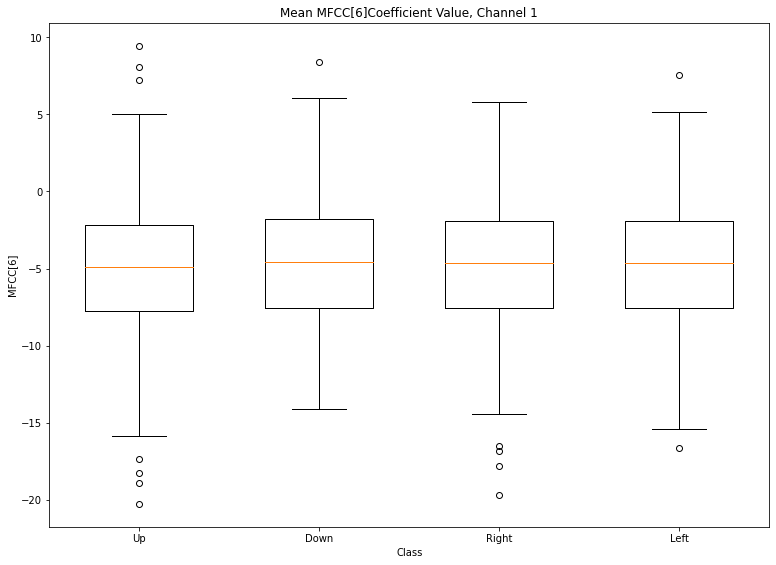

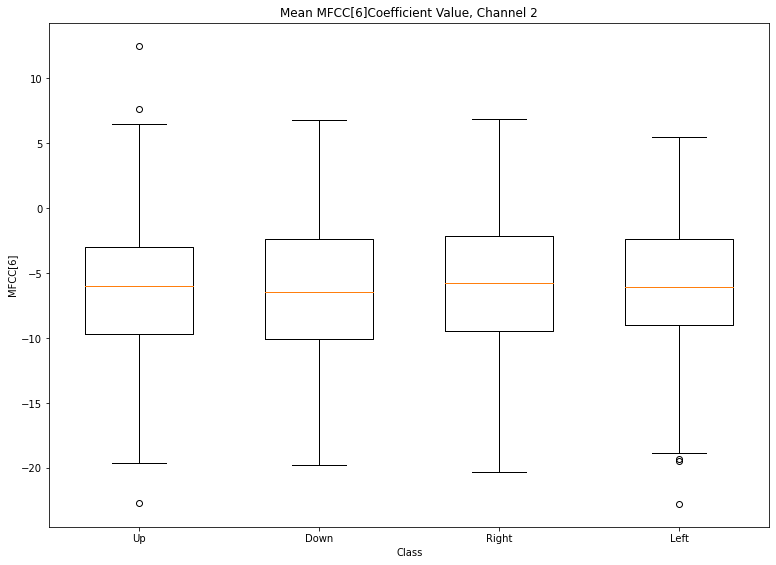

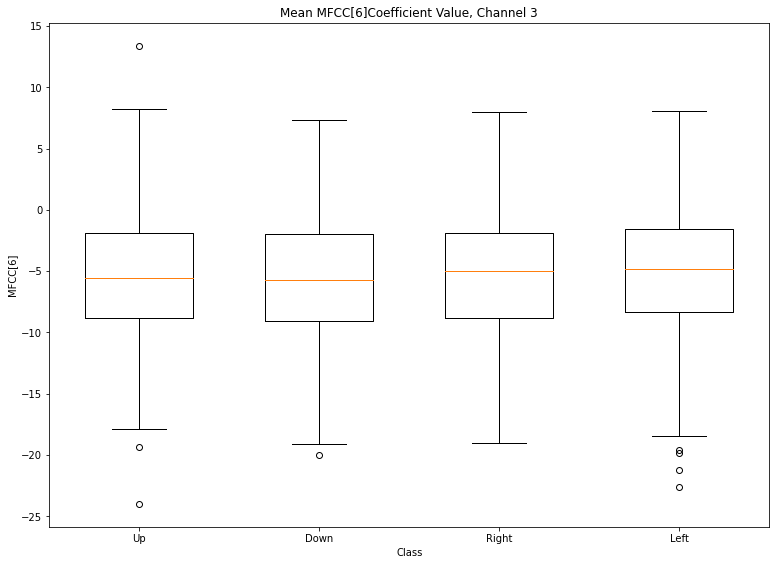

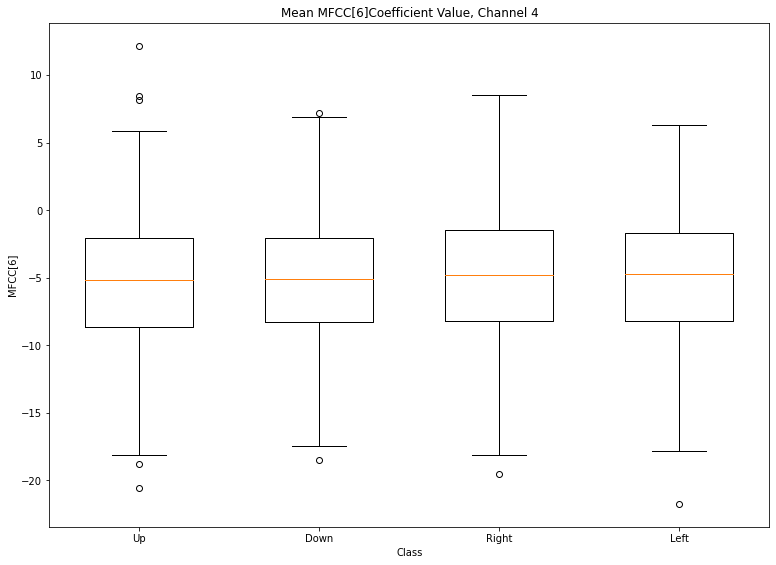

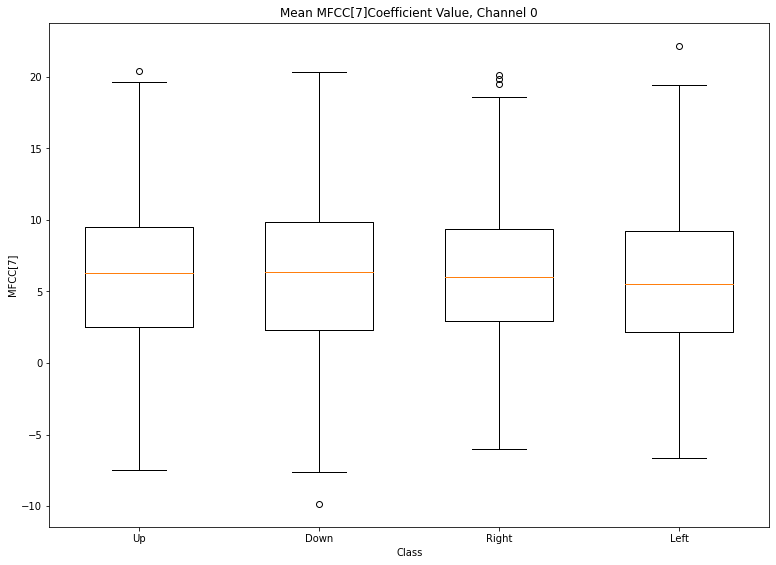

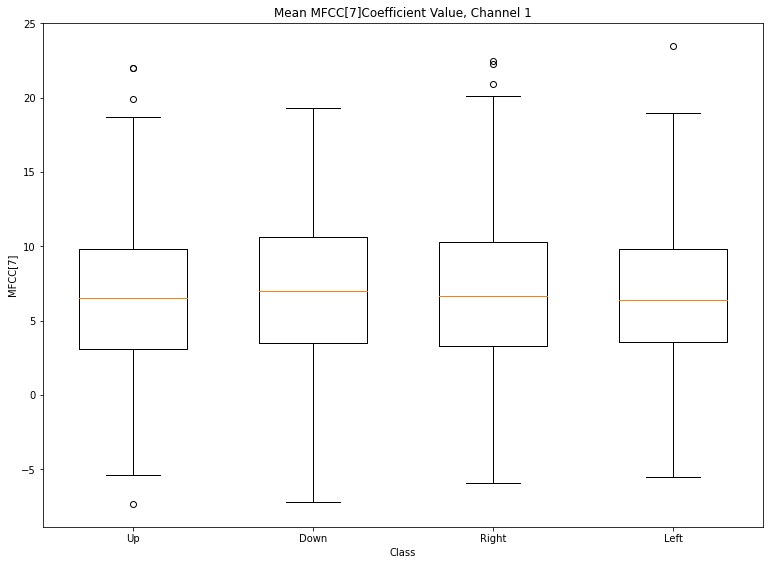

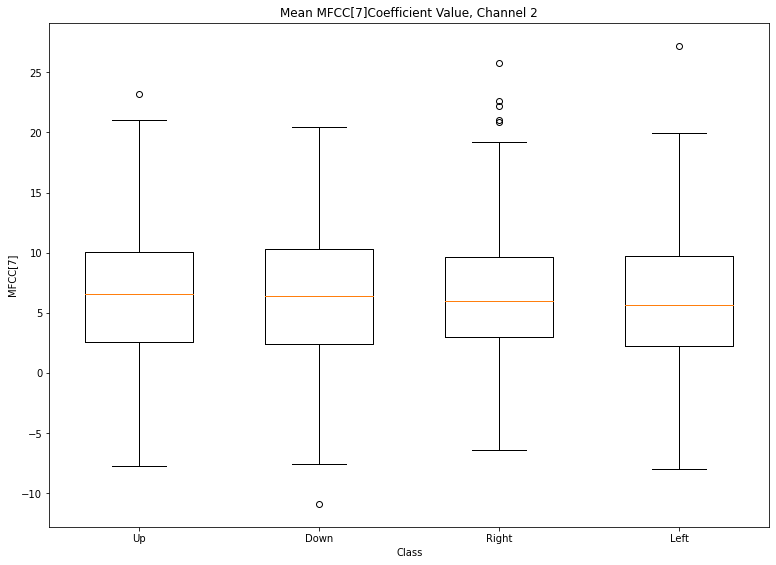

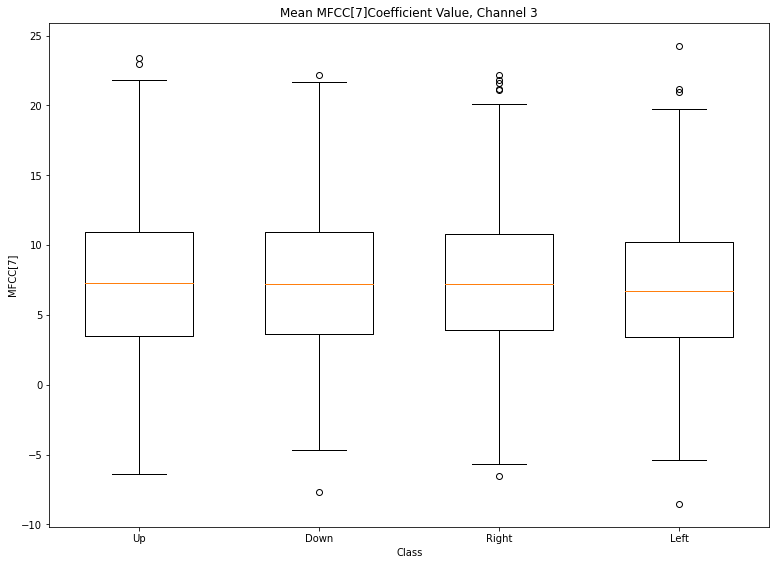

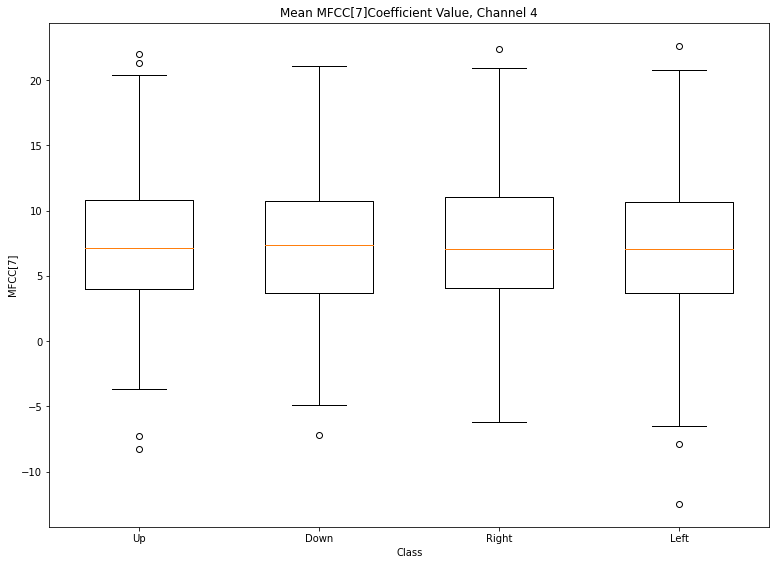

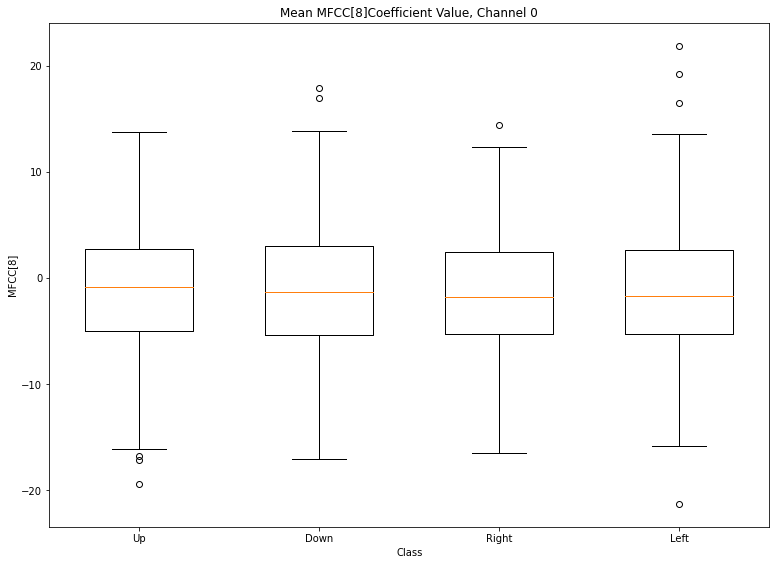

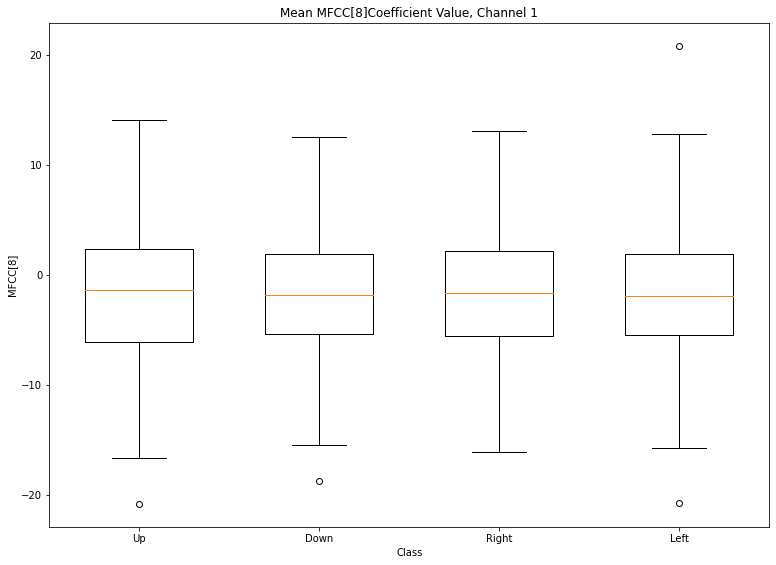

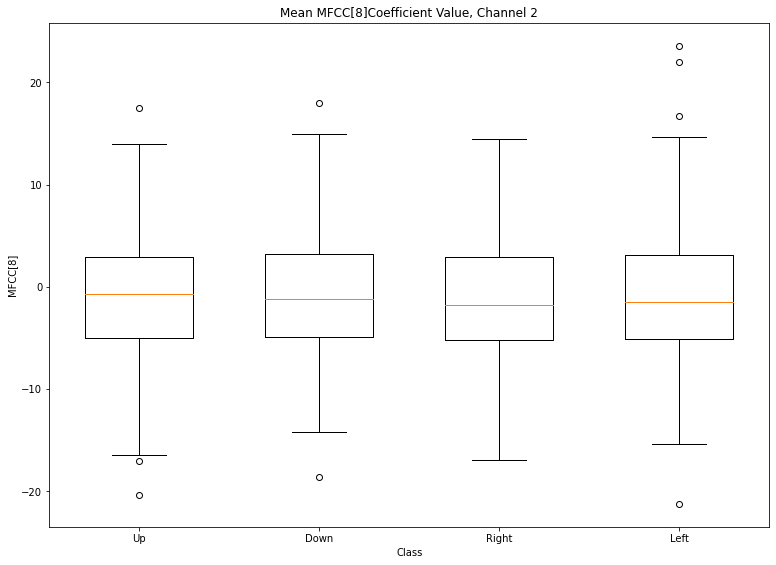

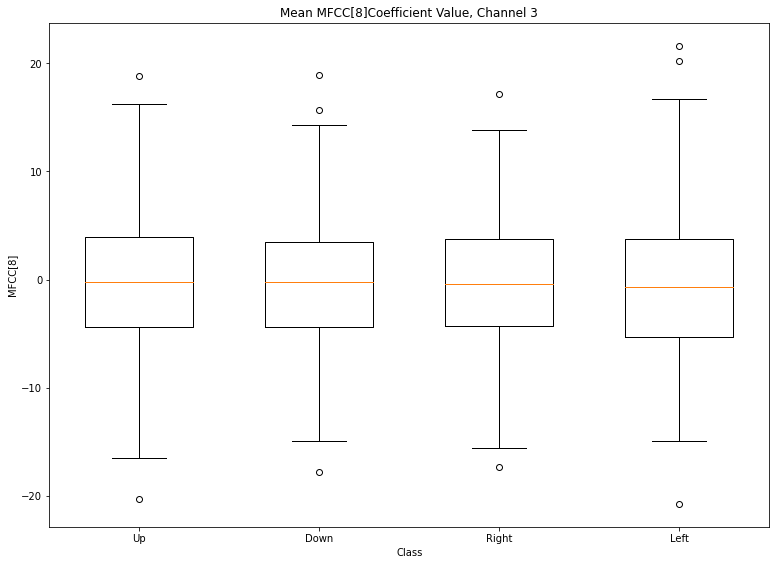

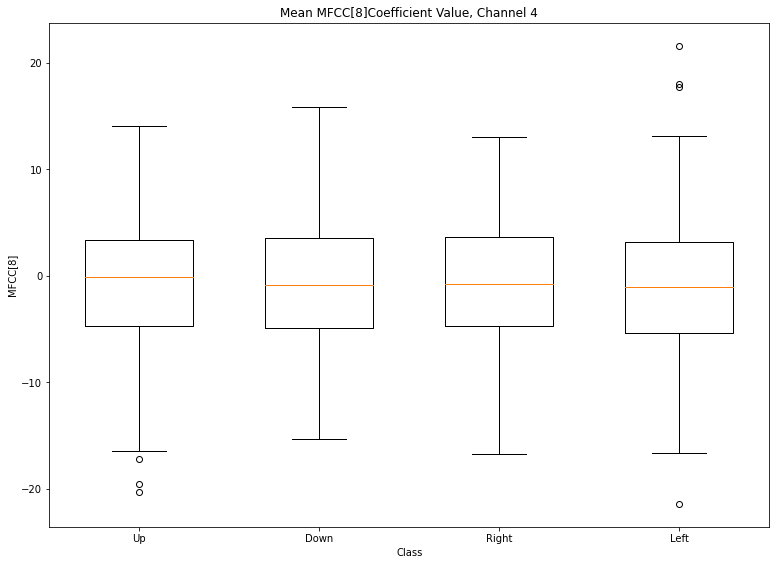

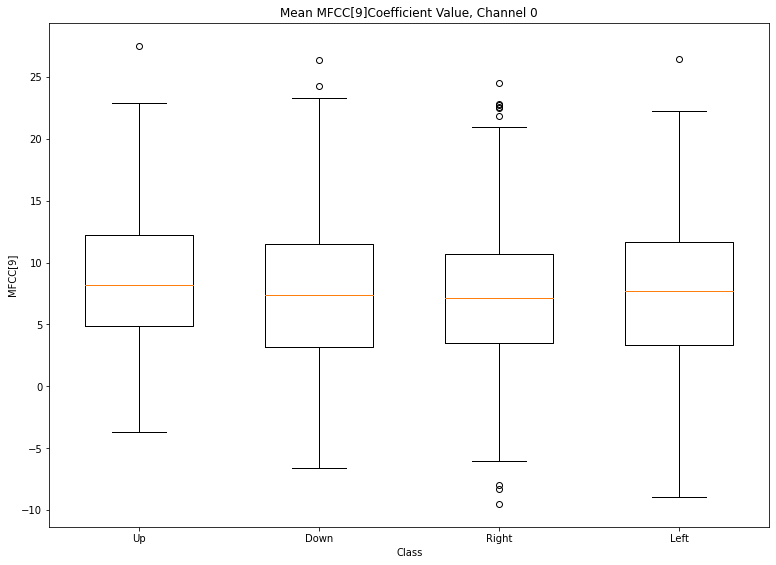

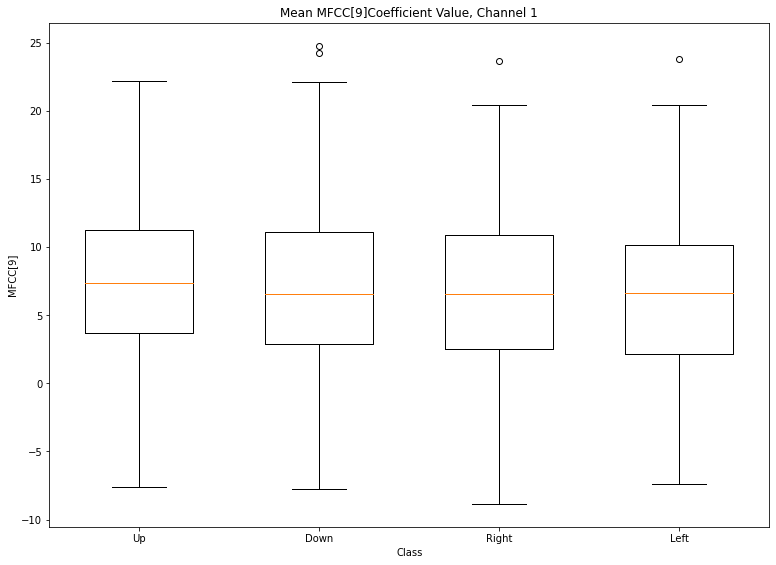

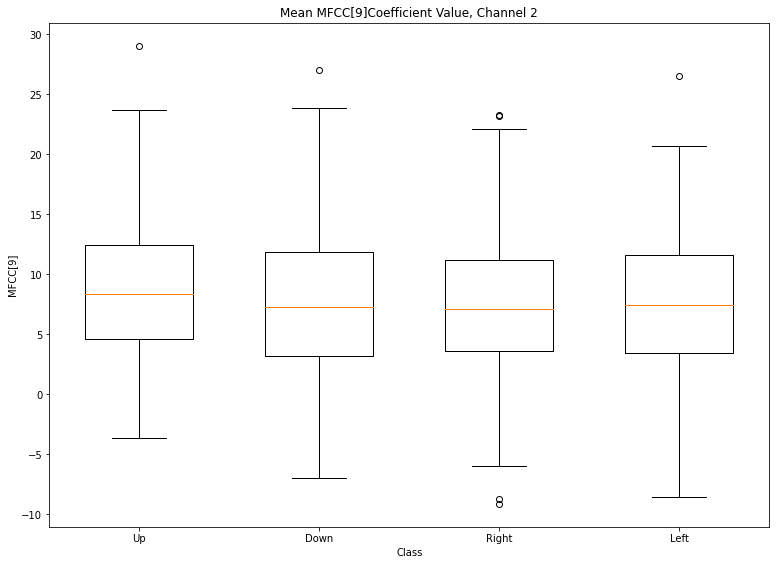

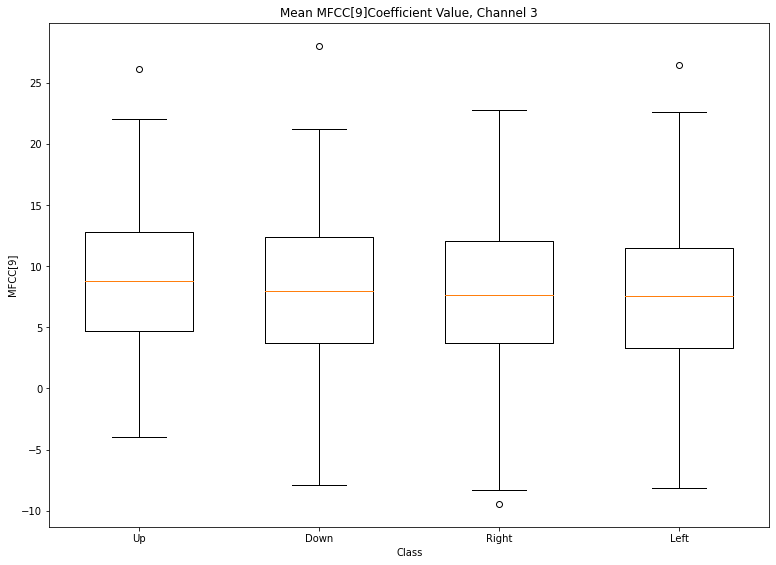

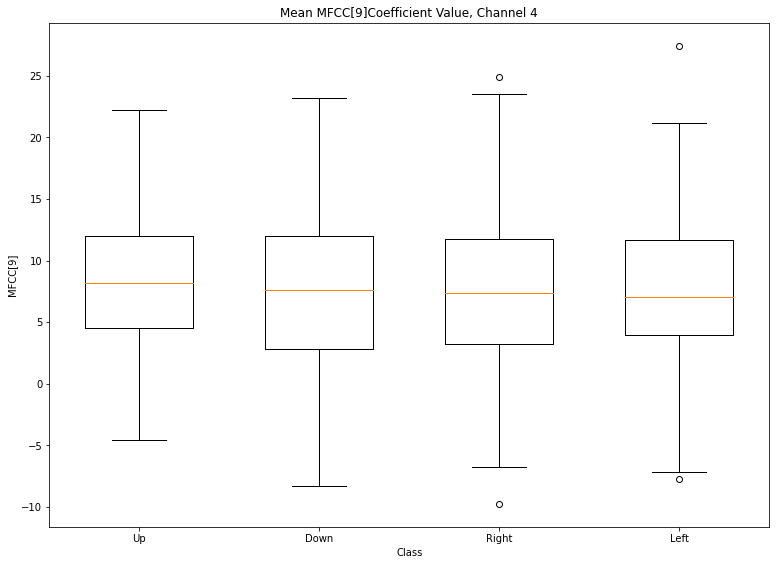

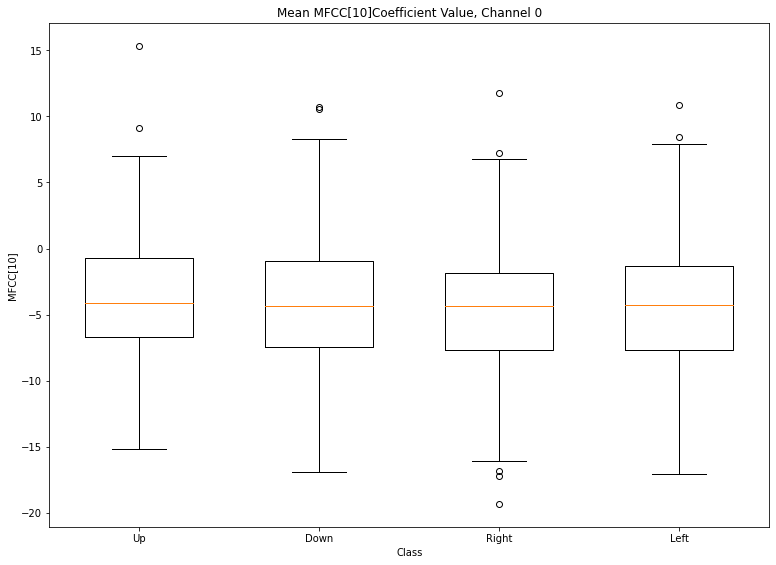

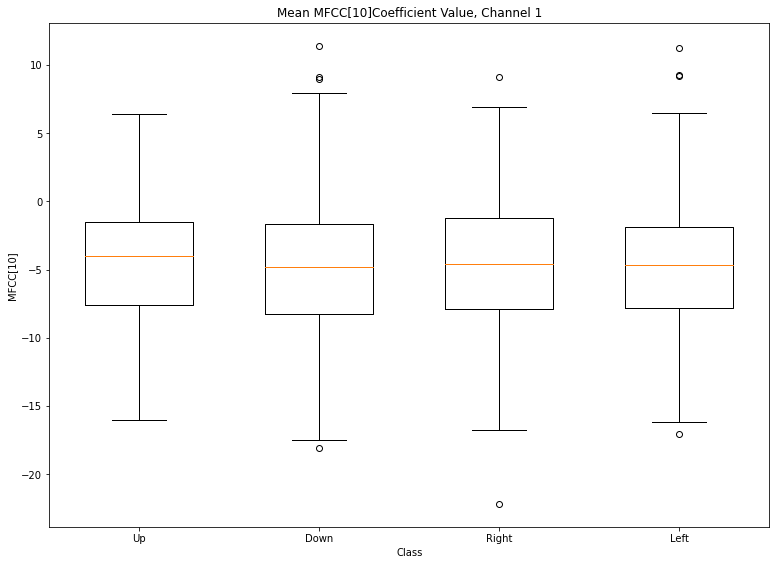

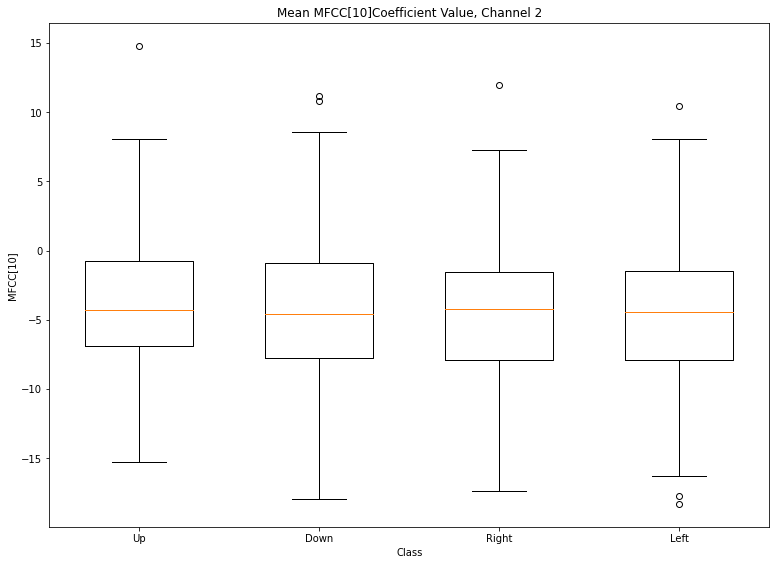

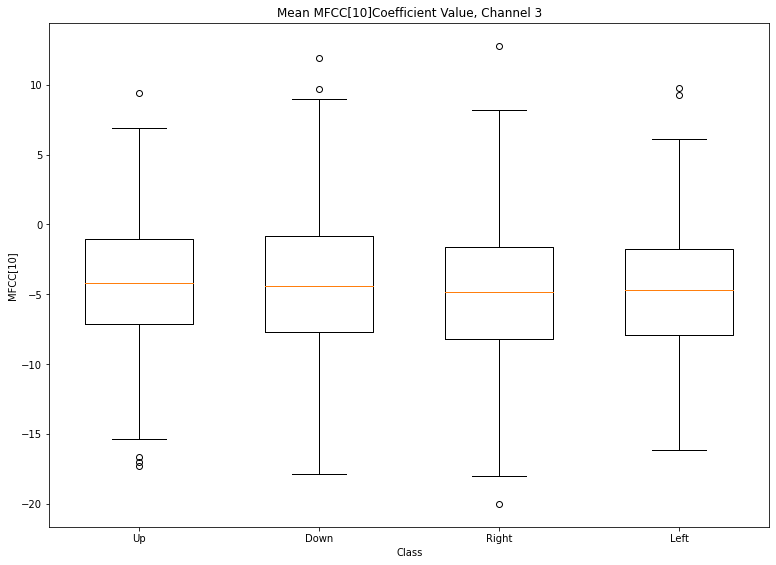

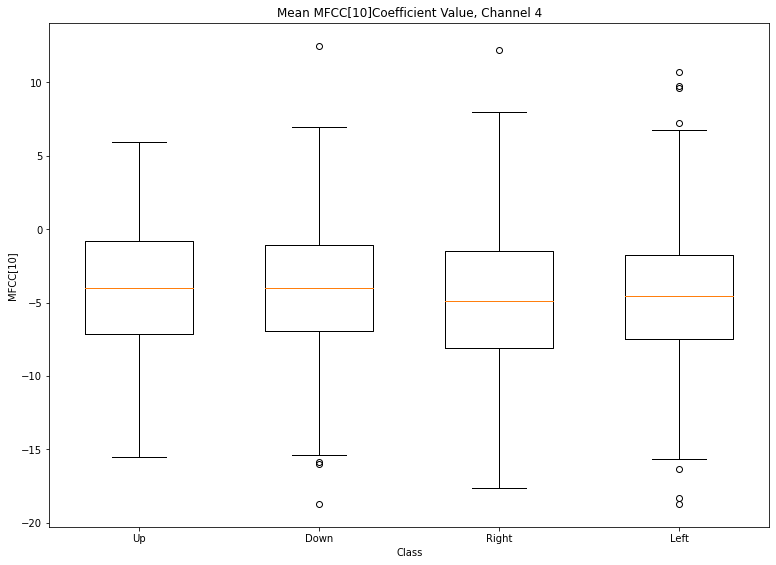

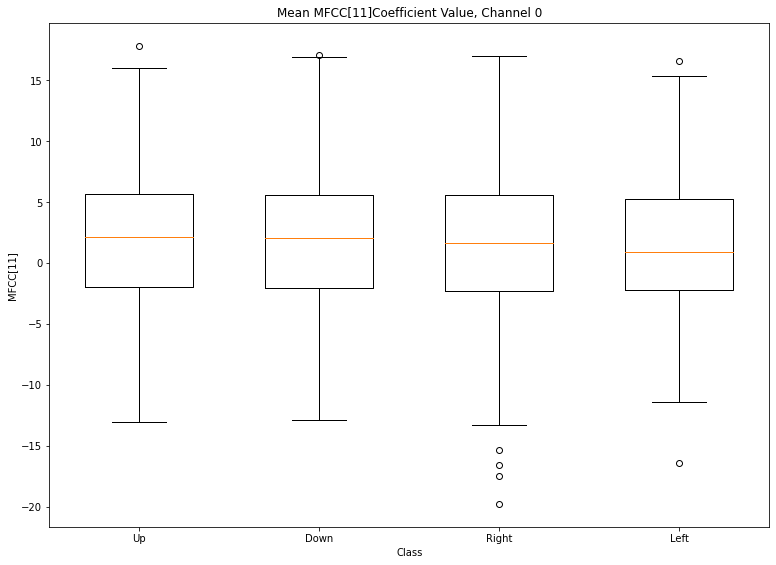

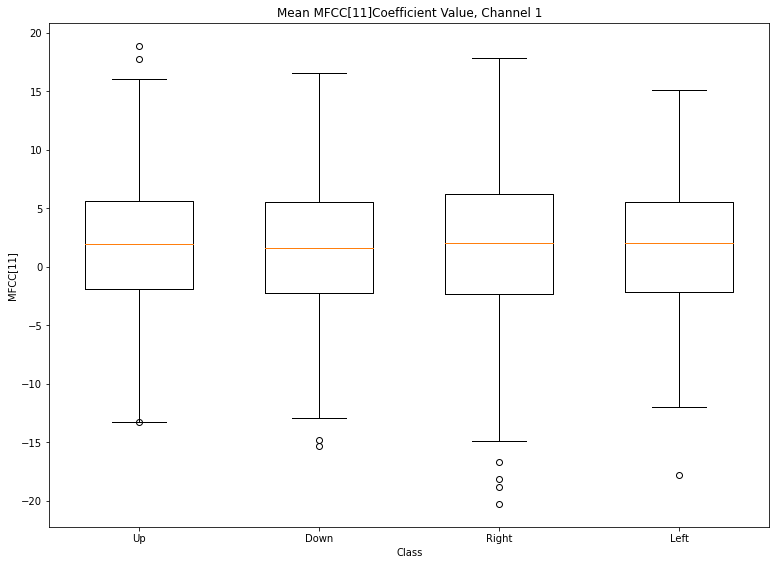

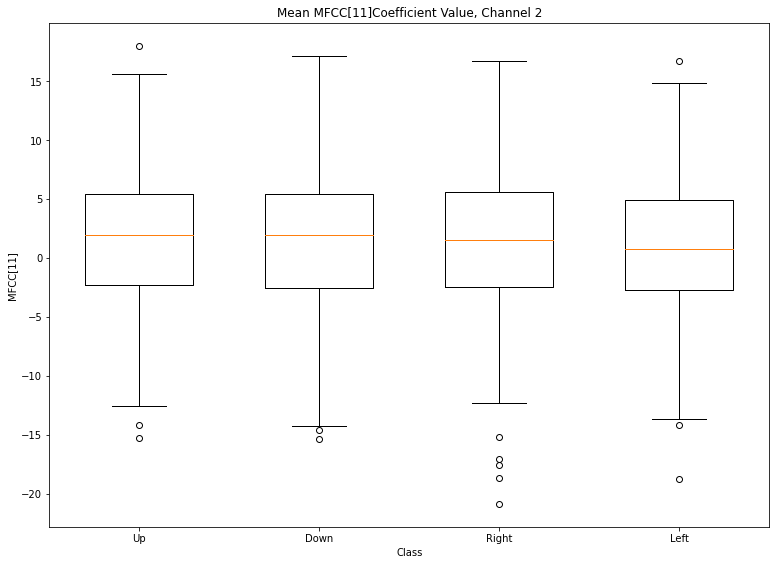

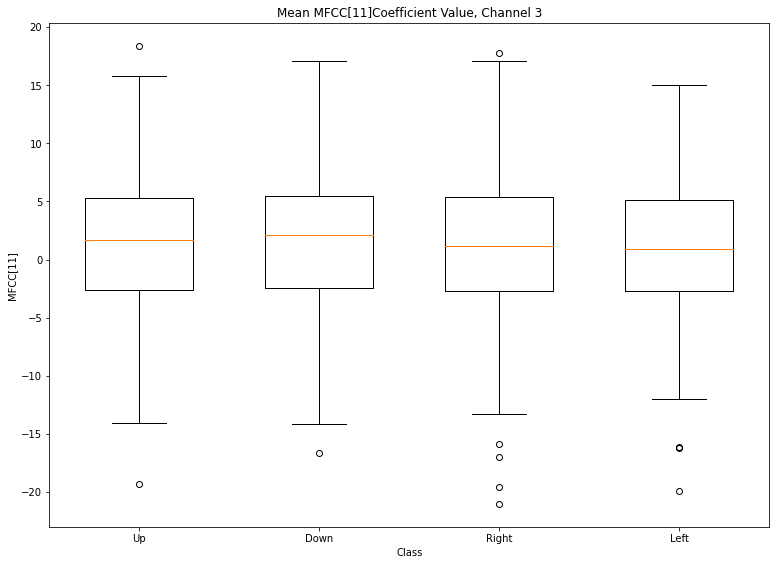

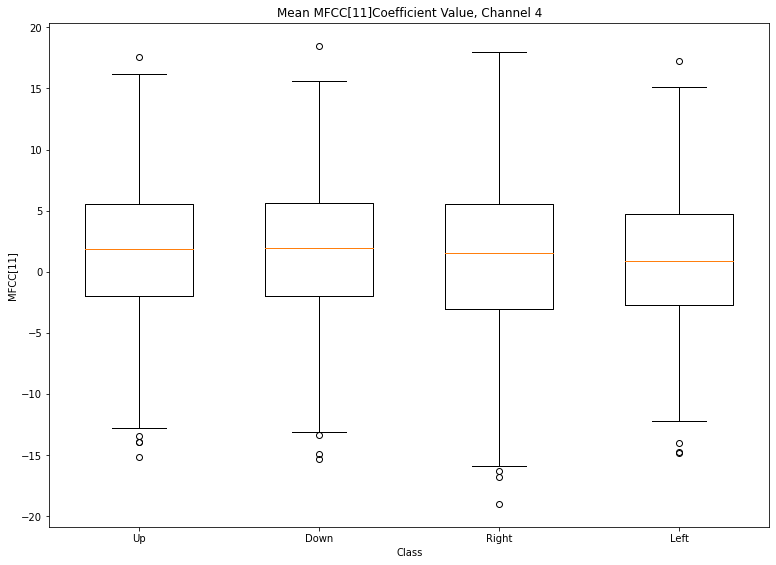

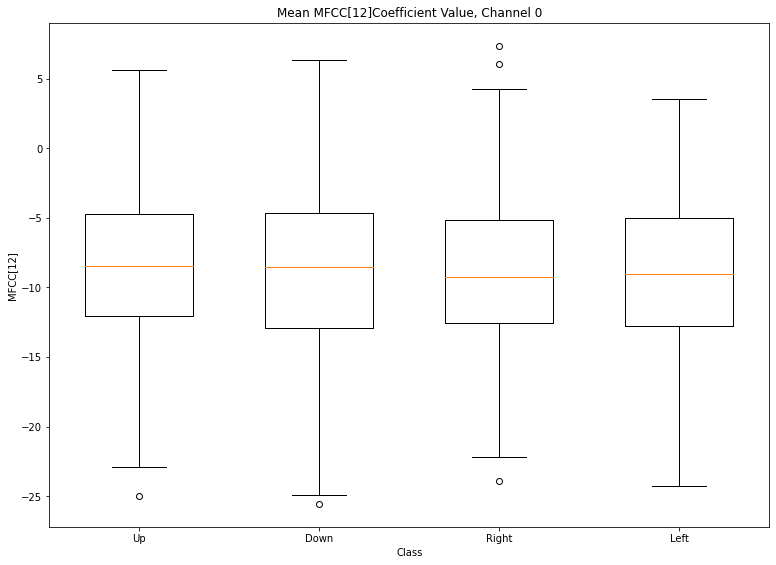

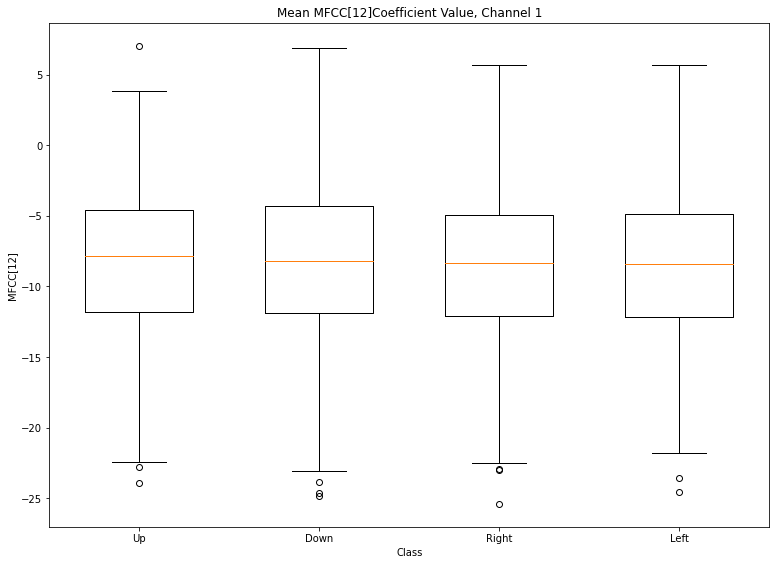

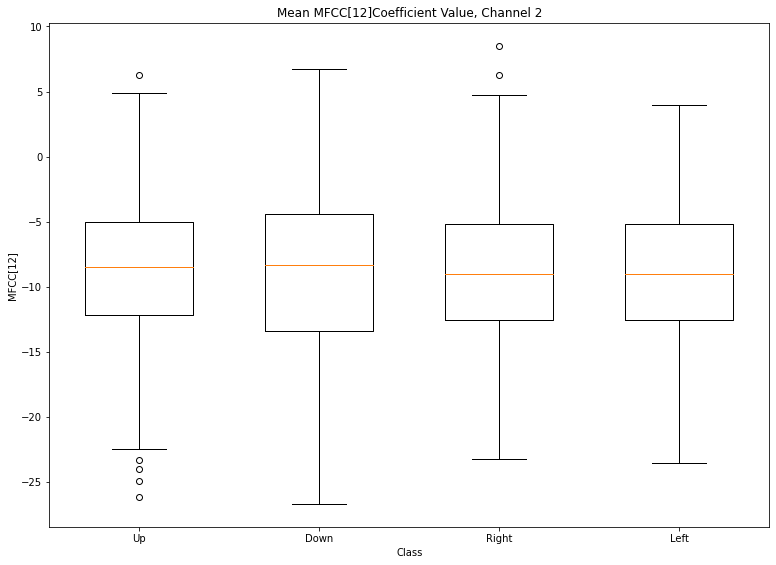

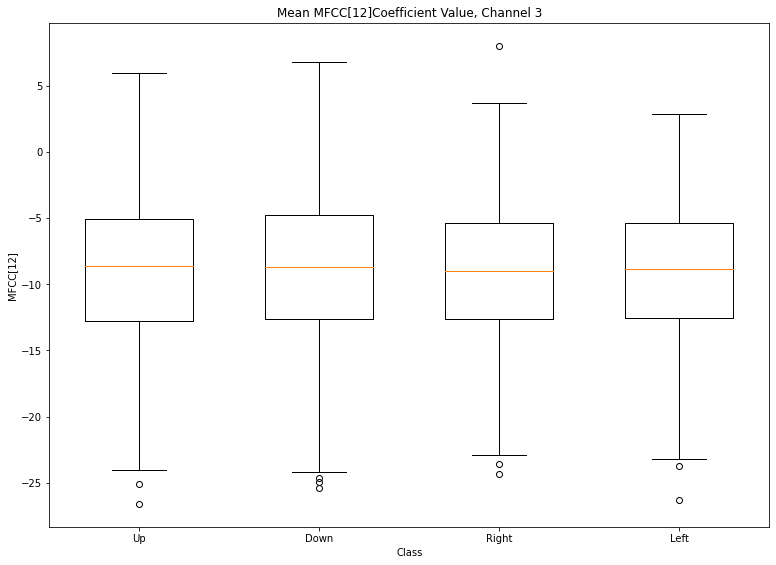

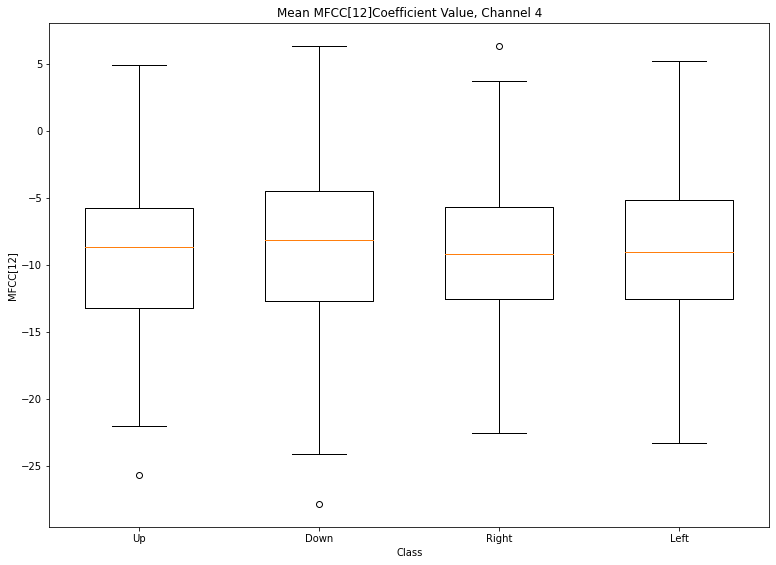

In [6]:
# Plotting MFCC distributions for each class

# For simplicity, we only select classes identified as discriminatory
# Loading data
from dataloader import get_loader
root = 'derivatives/'
creater = get_loader(root, channel_list= ["A4", "A5", "A19", "A20", "A32"], n_sess= 3)
xn, yn = creater.load_multiple_subjects([1, 2, 4, 5, 6, 7])

# # Declaring size parameters
import numpy as np
fs = int(254)
start_idx = int(1*fs)
stop_idx = int(3.5*fs)
xn = xn[:,:,start_idx:stop_idx]
a,r,c = xn.shape
yn = yn[:, 1]
num_channels = r
num_trials = a
num_coeffs = int(13)
rate = 16000
#
# Getting MFCC features
from python_speech_features import mfcc
mfcc_feats = np.zeros([a,r,num_coeffs])
for channel in range(num_channels):
    # Concatenating channel data to create 2-dimensional EEG data matrix
    for trial in range(num_trials):
        temp = mfcc(xn[trial,channel,:],rate)
        coeffs = temp.mean(axis=0)
        mfcc_feats[trial,channel,:] = coeffs

# To do this, we need to separate the features into the four classes
test_up = mfcc_feats[yn==0,:,:]
test_down = mfcc_feats[yn==1,:,:]
test_right = mfcc_feats[yn==2,:,:]
test_left = mfcc_feats[yn==3,:,:]

# Plotting the distributions for each MFCC coefficients
import matplotlib.pyplot as plt

for i in range(0,num_coeffs):
    for j in range(0,num_channels):
        data = [test_up[:,j,i],test_down[:,j,i],test_right[:,j,i],test_left[:,j,i]]
        fig = plt.figure(figsize =(10, 7))

        # Creating axes instance
        ax = fig.add_axes([0, 0, 1, 1])

        # Creating plot
        bp = ax.boxplot(data,positions = [1, 2, 3, 4], widths = 0.6)
        plt.xticks([1, 2, 3, 4], ['Up', 'Down', 'Right', 'Left'])
        plt.xlabel("Class")
        plt.ylabel("MFCC[%i]" %i)
        plt.title("Mean MFCC[%i]" %i + "Coefficient Value, Channel %i" %j)

    # show plot
    plt.show()
